### Plot results for accuracy-latency
- This script operates over data for models in `utils.VARY_ENCODER_LAYER` and `utils.VARY_HIDDEN_DIM` from `runscripts/utils.py`
- Run `runscripts/perf_eval.py` for latency measurements. 
- Run `runscripts/accuracy_no_progressive_shrinking.py` for accuracy measurements

In [4]:
from typing import List
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import torch
from pathlib import Path
import os
import sys; sys.path.append('../runscripts')
import constants
import accuracy_no_progressive_shrinking as acc_script

In [5]:
# Set num trials based on number of trials used in perf_eval
NUM_TRIALS = 3
LATENCY_DIR = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()),"..","runscripts","outputs_perf_eval","main"))
# Percentile to use for latency points
PERCENTILE = 0.95

In [6]:
def get_latency(model_name: str) -> List[float]:
    '''
    Return percentile latency for that model
    '''
    latencies = []
    for j in range(1, NUM_TRIALS+1):
        log_dir = os.path.join(LATENCY_DIR, "Trial"+str(j), model_name+"_time_stamp.log")
        data_file = pd.read_csv(log_dir,header=None)[0].tolist()
        data = [x for x in data_file]
        latencies.append(np.percentile(data, PERCENTILE))
    return np.mean(latencies)
    
def get_accuracy(model_name: str, output_dir: Path) -> List[float]:
    pt_file = model_name + '_test_acc.pt'
    pt_file = output_dir / pt_file
    acc = np.max(torch.load(pt_file))
    return acc

def create_graph(input_list: List[str], acc_output_dir: Path, title: str, figname: str, figsize=(10, 7.5)):
    plt.clf()
    plt.rcParams["figure.figsize"] = figsize
    plt.rcParams["figure.autolayout"] = True
    X, Y = [], []
    # get data
    for model_name in input_list:
        acc, lat = get_accuracy(model_name, acc_output_dir), get_latency(model_name)
        X.append(lat); Y.append(acc)
    # create plot and label
    plt.scatter(X, Y)
    plt.plot(X, Y)
    for i, model_name in enumerate(input_list):
        label = model_name.split('_')[2:]
        if not label:
            label = model_name
        plt.annotate(label, (X[i], Y[i]), (X[i]+0.02, Y[i]-0.002))
        print(label,X[i], Y[i] )
    # display plot
    plt.ylabel('Accuracy')
    plt.xlabel(f'{int(PERCENTILE * 100)}th Percentile Latency(ms)')
    plt.title(title)
    plt.savefig(fig_name)
    plt.show()
    


['L-2', 'H-768', 'A-12'] 54.609611271999995 0.8508928571428571
['L-4', 'H-768', 'A-12'] 108.55607914133333 0.8897321428571429
['L-6', 'H-768', 'A-12'] 162.56444011733333 0.8957589285714286
['L-8', 'H-768', 'A-12'] 216.2380845253333 0.9053571428571429
['L-10', 'H-768', 'A-12'] 270.153784376 0.9154017857142858
['L-12', 'H-768', 'A-12'] 323.90019500266663 0.9180803571428572


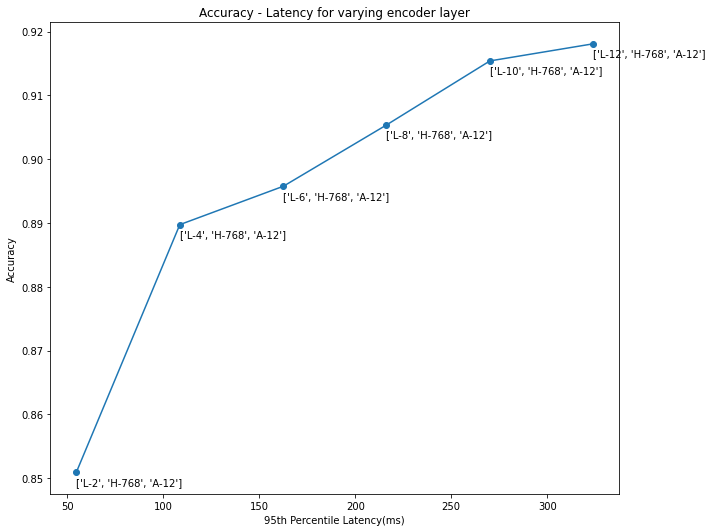

In [7]:
input_list = [x.split("/")[-1] for x in constants.VARY_ENCODER_LAYER]
acc_dir = acc_script.get_layer_output_dir(id="11_12")
title = "Accuracy - Latency for varying encoder layer"
fig_name="layer_accuracy_latency.png"
create_graph(input_list, acc_dir, title, fig_name)

In [16]:
input_list = [x.split("/")[-1] for x in constants.VARY_HIDDEN_DIM]
acc_dir = acc_script.get_hidden_dim_output_dir(id="11_12")
title = "Accuracy - Latency for varying hidden dimension"
fig_name="hidden_accuracy_latency.png"
create_graph(input_list, acc_dir, title, fig_name)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ilee300/workspace/ofa_transformers_runfiles/notebooks/../runscripts/outputs_acc_no_progressive/11_12/vary_hidden_dim/bert_uncased_L-12_H-512_A-8_test_acc.pt'

<Figure size 720x540 with 0 Axes>

tiny 5.170050047999999 0.7823660714285714
mini 21.013924453333335 0.8125
small 56.221618408000005 0.8553571428571428
medium 112.52036641333332 0.8883928571428571
base 324.0740922106666 0.9180803571428572


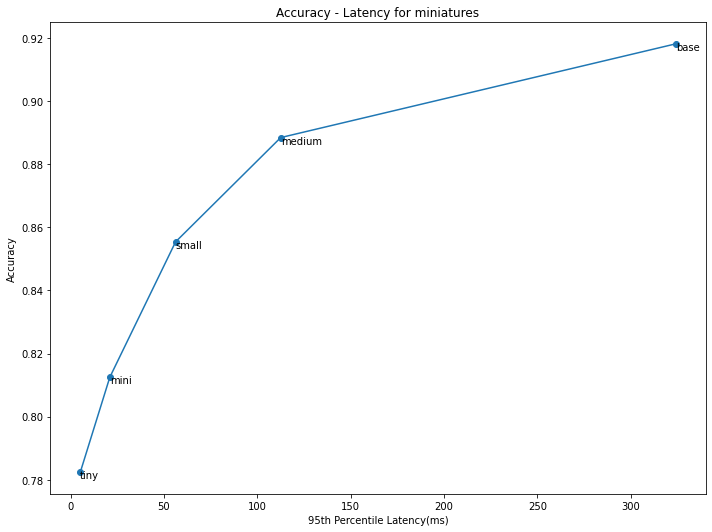

In [8]:
input_list = [x.split("/")[-1] for x in constants.VARY_MINIATURES.keys()]
acc_dir = acc_script.get_miniature_output_dir(id="11_12")
title = "Accuracy - Latency for miniatures"
fig_name="miniature_accuracy_latency.png"
create_graph(input_list, acc_dir, title, fig_name)